### En este notebook se descrbirá únicamente el método de cosinor debido a que el otro método se describió en el otro notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

import codecs
import os

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

from numpy import pi, r_
from scipy import optimize

from scipy.signal import find_peaks_cwt

In [2]:
import os
cwd = os.getcwd() # directorio actual
print(cwd) # imprimir directorio actual

for file in os.listdir():
    if file.endswith(".csv",):
        print(os.path.join(file))

/home/sahine_soots/Documents/Trabajo/Fisica Biomedica/4to/Algoritmos2019-2/Proyecto/Presentación
oscar (2016-08-14)60secDataTable.csv


In [3]:
act=np.loadtxt("oscar (2016-08-14)60secDataTable.csv",delimiter=",",skiprows=217,usecols=11)
print(len(act))
print(act.shape)

10857
(10857,)


In [4]:
Datr = ['{:}'.format(i) for i in act]
Datr

['0.0',
 '0.0',
 '0.0',
 '2525.91',
 '1696.86',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '107.0',
 '12.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1715.57',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1952.21',
 '973.88',
 '338.08',
 '0.0',
 '12.17',
 '0.0',
 '726.91',
 '66.0',
 '1324.23',
 '0.0',
 '0.0',
 '0.0',
 '2690.94',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '979.91',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '3617.58',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '

In [5]:
f = open("oscar (2016-08-14)60secDataTable.txt","w")
for i in Datr:
    f.write(i)
    f.write("\n")    
f.close()

In [6]:
import os
cwd = os.getcwd() # directorio actual
print(cwd) # imprimir directorio actual

for file in os.listdir():
    if file.endswith(".txt"):
        print(os.path.join(file))

/home/sahine_soots/Documents/Trabajo/Fisica Biomedica/4to/Algoritmos2019-2/Proyecto/Presentación
oscar (2016-08-14)60secDataTable.txt


In [7]:
Archivo = codecs.open("oscar (2016-08-14)60secDataTable.txt", encoding = 'cp1252') 
Datos = np.loadtxt(Archivo)
#Datos = np.loadtxt(Archivo, delimiter=",",skiprows=9,usecols=range(3,11))
print(len(Datos))
print(Datos.shape)
print(Datos)

10857
(10857,)
[   0.      0.      0.   ... 3710.17   28.      0.  ]


10857


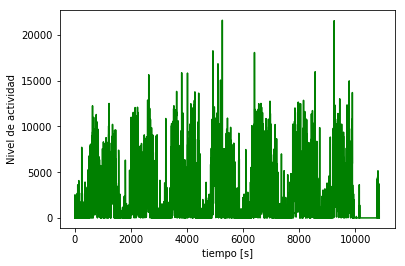

In [8]:
Act1=Datos # temperatura corresponde con 8a columna del rango importado usecols=range(3,11)
Dim=len(Act1)
print(Dim) # imprimir longitud serie
#print(Act[0:5]) # imprimir elementos 1 a 5
#print(Act[-5:-1]) # imprimir últimos 5 elementos

plt.clf() # borrar todas las imágenes de la memoria
plt.plot(Act1,'green') # graficar serie de actigrafía
plt.xlabel("tiempo [s]")
plt.ylabel("Nivel de actividad")
plt.show() #

First 5 time series values: ['0.0', '0.0', '0.0', '2525.91', '1696.86']
First 5 time series values: [   0.      0.      0.   2525.91 1696.86]
Average value of time series: 2532.515561388966
Length of time series 10857


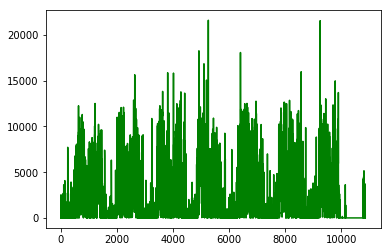

In [9]:
Datos=open("oscar (2016-08-14)60secDataTable.txt", "r")
Serie=Datos.read().split('\n')
print('First 5 time series values:',Serie[0:5])
Datos1= np.loadtxt(Serie)
Kleur = 'green'

#Serie=np.array(Serie).astype(np.float) # convert to numerical values
#SBP=Serie=np.array(Serie,dtype=float) # alternative command
print('First 5 time series values:',Datos1[0:5])
N=len(Datos1)
print('Average value of time series:',np.mean(Datos1))
print('Length of time series',N)
plt.clf()
plt.plot(Datos1,Kleur)
plt.show()

In [10]:
def ScreeSSA(Serie,L): # 2 <= L <= N/2
    from scipy import linalg # linear algebra (matrix) processing package
    N=len(Serie)
    print(N)
    K=N-L+1
    print(K)
    X=np.array([[Serie[i+j] for j in range(0,L)] for i in range(0,K)])
    print(X)
    s=linalg.svd(X,compute_uv=False) # singular values
    l=s**2 # partial variances
    return l
#ScreeSSA(Datos1,1440)

In [11]:
def SSA(Serie,L): # 2 <= L <= N/2
    ### import packages ###
    import numpy as np
    from scipy import linalg # linear algebra (matrix) processing package
    import math   # math module
    ### initialize variables ###
    N=len(Serie)
    K=N-L+1
    ### SVD ###
    X=np.array([[Serie[i+j] for j in range(0,L)] for i in range(0,K)]) # trajectory matrix
    U, s, V=linalg.svd(X) # singular value decomposition (SVD) 
    l=s**2 # partial variances
    r=len(s)#np.linalg.matrix_rank(X) # matrix rank and total number of components
    ### time-series components ###
    gkList=np.zeros(shape=(r,N)) # zero matrix in whose rows SSA components will be saved
    for k in range(0,r):
            Uk=U[:,k] # k-th order column singular vector
            Vk=V[k,:] # k-th order row singular vector
            Xk=s[k]*np.outer(Uk,Vk) # k-th order matrix component
            gk=[] # empty array in which to save successive k-th order component values 
            for i in range(min(K-1,L-1),-max(K-1,L-1)-1,-1): # loop over diagonals
                gki=np.mean(np.diag(np.fliplr(Xk),i)) # successive time.series values
                gk.append(gki)
            gkList[k]=gk # k-th order component
    ### w-corr matrix ###
    w=[] # empty array to which to add successive weights
    LL=min(L,K)
    KK=max(L,K)
    for ll in range(1,LL+1): # first 1/3 part of weights
        w.append(ll)
    for ll in range(LL+1,KK+1): # second 1/3 part of weights
        w.append(LL)
    for ll in range(KK+1,N+1): # third 1/3 part of weights
        w.append(N-ll)
    kMin=kkMin=0 # show w-corr matrix for first 20 index values
    kMax=kkMax=20
    #wMatriz=np.zeros(shape=(kMin,kMax)) # initial zero matrix  
    #for k in range(kMin,kMax):
        #for kk in range(kkMin,kkMax):
            #wMatriz[k][kk]=sum(w*gkList[k]*gkList[kk])/(math.sqrt(sum(w*gkList[k]*gkList[k]))*math.sqrt(sum(w*gkList[kk]*gkList[kk])))   
    wMatriz=[[sum(w*gkList[k]*gkList[kk])/(math.sqrt(sum(w*gkList[k]*gkList[k]))*math.sqrt(sum(w*gkList[kk]*gkList[kk]))) for k in range(kMin,kMax)] for kk in range(kkMin,kkMax)]
    wMatriz=np.array(wMatriz)
    return (r, l, gkList, wMatriz); 

Time= 2019-06-05 12:32:38.177304
10857
9418
[[   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.   2525.91 ...    0.      0.      0.  ]
 [   0.   2525.91 1696.86 ...    0.      0.      0.  ]
 ...
 [4795.71 3750.57 4224.92 ...    0.      0.   3710.17]
 [3750.57 4224.92 2878.46 ...    0.   3710.17   28.  ]
 [4224.92 2878.46 2832.89 ... 3710.17   28.      0.  ]]
Time= 2019-06-05 12:32:43.948801


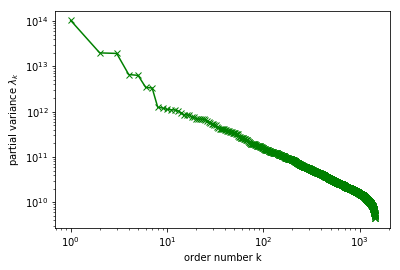

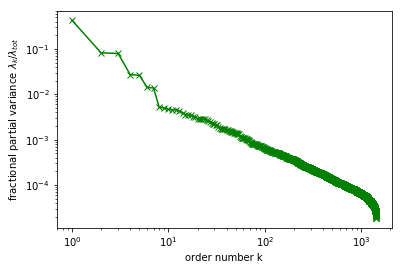

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import math # math module
from datetime import datetime
print('Time=',str(datetime.now()))
L=1440
l=ScreeSSA(Datos1,L)
print('Time=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
plt.clf()
plt.plot(k,l,'-x',color=Kleur)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')

plt.ylabel(r'partial variance $\lambda_k$')
plt.show()
plt.clf()
plt.plot(k,l/sum(l),'-x',color=Kleur)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')
plt.ylabel(r'fractional partial variance $\lambda_k/\lambda_{tot}$')
plt.show()


Time= 2019-06-05 12:32:48.235570
10857
9418
[[-0.80662184 -0.80662184 -0.80662184 ... -0.80662184 -0.80662184
  -0.80662184]
 [-0.80662184 -0.80662184 -0.00210391 ... -0.80662184 -0.80662184
  -0.80662184]
 [-0.80662184 -0.00210391 -0.26616145 ... -0.80662184 -0.80662184
  -0.80662184]
 ...
 [ 0.7208414   0.38795786  0.53904126 ... -0.80662184 -0.80662184
   0.37509021]
 [ 0.38795786  0.53904126  0.11018544 ... -0.80662184  0.37509021
  -0.79770367]
 [ 0.53904126  0.11018544  0.09567111 ...  0.37509021 -0.79770367
  -0.80662184]]
Time= 2019-06-05 12:32:53.904563


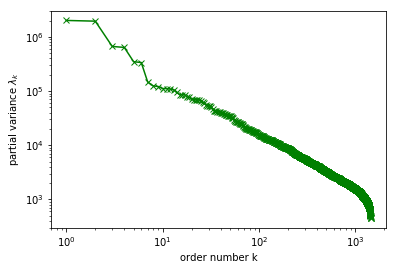

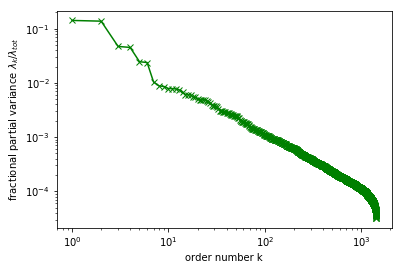

In [13]:
print('Time=',str(datetime.now()))
L=1440
Fluct=(Datos1-np.mean(Datos1))/np.std(Datos1)
l=ScreeSSA(Fluct,L)
print('Time=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
plt.clf()
plt.plot(k,l,'-x',color=Kleur)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')
plt.ylabel(r'partial variance $\lambda_k$')
plt.show()
plt.clf()
plt.plot(k,l/sum(l),'-x',color=Kleur)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('order number k')
plt.ylabel(r'fractional partial variance $\lambda_k/\lambda_{tot}$')
plt.show()

Time= 2019-06-05 12:33:05.409369
Time= 2019-06-05 12:43:00.958506


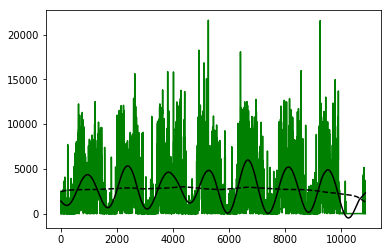

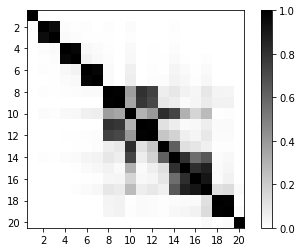

Acrofases (máximos locales); [    4   984  2378  3782  5306  6661  8162  9516 10853]  (como tiempo corrido)
Acrofases (máximos locales); [ 0.06666667 16.4        15.63333333 15.03333333 16.43333333 15.01666667
 16.03333333 14.6        12.88333333]  (como horas después de la medianoche)
Acrofases (máximos locales); [  1.   246.   234.5  225.5  246.5  225.25 240.5  219.   193.25]  (como grados después de la medianoche)


In [14]:
print('Time=',str(datetime.now()))
L=1440
r, l, gkList, wMatriz = SSA(Datos1,L)
print('Time=',str(datetime.now()))
Trend=gkList[0]
Circ=gkList[1]+gkList[2]
plt.plot(Datos1,color=Kleur)
plt.plot(Trend,'--',color='black')
plt.plot(Trend+Circ,color='black')
plt.show()
x=np.arange(1, 20, 2)
y=x+1
plt.clf()
plt.imshow(wMatriz,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()
X= gkList[0]+gkList[1]+gkList[2]
indexes=find_peaks_cwt(X,np.arange(1, 550))
print("Acrofases (máximos locales);", indexes," (como tiempo corrido)")
print("Acrofases (máximos locales);", indexes%1440/60," (como horas después de la medianoche)")
print("Acrofases (máximos locales);", indexes%1440/1440*360," (como grados después de la medianoche)")

In [18]:
def promedio(lista):
    n = len(lista)
    prom = sum(lista)/n
    return(prom)

In [19]:
ts = []
def Periodo(myarray):
    lista = np.array(myarray).tolist()
    i = lista[0]
    f = lista[-1]
    lista.remove(i)
    lista.remove(f)
    a = (len(lista))
    for i in range(0,a-1):
    #print(i)
        t = lista[i+1]-lista[i]
        ts.append(t)
        T = promedio(ts)
    return(T)
Periodo(indexes)

1422.0

In [22]:
a = 2378-984
print(a)
b = 3782-2378
print(b)
c = 5306-3782
print(c)
d = 6661-5306
print(d)
e = 8162-6661
print(e)
f = 9516-8162
print(f)
print("promedio T: ", (a+b+c+d+e+f)/6)

1394
1404
1524
1355
1501
1354
promedio T:  1422.0


### A partir de aquí empieza el análisis de cosinor

Periodo T= 1440 , promedio (mesor) M= 2602.6289320777246 , amplitud A= -2302.798227041099  fase Phi= -0.9383792876446763 , coeficiente de determinación R^2= 0.268398408934187
10857
Acrofases (máximos locales); [    4   935  2375  3815  5255  6695  8135  9575 10853]  (como tiempo corrido)
Acrofases (máximos locales); [ 0.06666667 15.58333333 15.58333333 15.58333333 15.58333333 15.58333333
 15.58333333 15.58333333 12.88333333]  (como horas después de la medianoche)
Acrofases (máximos locales); [  1.   233.75 233.75 233.75 233.75 233.75 233.75 233.75 193.25]  (como grados después de la medianoche)


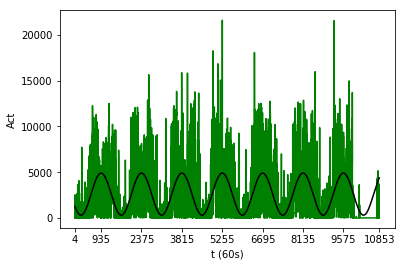

In [14]:
Serie=Datos1 #de los datos que se exportaron se define a serie como los datos
T=1440 #se define el periodo el cual será fijo
#T = 480 
#dt = 3840
dt=10080 #se define un diferencial de tiempo que es el número total de datos que se tienen en una semana 1440 datos por día, por 7 días
Dim=len(Datos1)#se define la dimensión como la longitud de la serie de tiempo
tiempo=np.linspace(0,Dim,Dim) #se hace un linspace entre cero y la longitud de de la  serie
#print(tiempo)
#print(len(tiempo))
fitfunc=lambda p, t: p[0]+p[1]*np.cos(2*np.pi*t/T+p[2])#se define la función del seno que se ajustará a los datos, la cual 
#depende de p que debe ser una lista
errfunc=lambda p, t, y:fitfunc(p,t)-y 
p0=[0,0,0] #se define el punto de inicio
p1,success=optimize.leastsq(errfunc,p0[:],args=(tiempo,Serie))# se utiliza la función optimize.leastsq la cual minimiza 
#elcuadrado de ecuaciones y se ocupa con los elementos iniciales, dentro del linspace y los datos de la serie
M=MAct=p1[0] #M que será mesor o la tendencia es el primer elemento de p1 que es obtiene a través de la función optimize
A=AAct=p1[1] #A es la ampllitud de la onda seno que se ajustará este element también se obtiene de la función optimize
Phi=PhiAct=p1[2] #el tercer elemento será la fase 
R2=1-sum((Serie-fitfunc(p1,tiempo))**2)/(Dim*np.var(Serie)) #se obtiene el coeficiente correlación  de los datos
print("Periodo T=",T,", promedio (mesor) M=",M,", amplitud A=",A," fase Phi=",Phi,", coeficiente de determinación R^2=",R2)

t=np.linspace(1,dt,dt)
#x=M+A*np.cos(2*np.pi/T*t+Phi)
x=M+A*np.cos(2*np.pi/T*tiempo+Phi)
print(len(x))

indexess=find_peaks_cwt(x,np.arange(1, 550))#por medio de la función find_peaks se obtienen las acrofases que son el punto del
#día donde la actividad es máxima 
print("Acrofases (máximos locales);", indexess," (como tiempo corrido)")
print("Acrofases (máximos locales);", indexess%1440/60," (como horas después de la medianoche)")
print("Acrofases (máximos locales);", indexess%1440/1440*360," (como grados después de la medianoche)")

plt.clf()

plt.plot(Serie,"green") #se grafica la serie de tiempo en verde
plt.plot(tiempo,M+A*np.cos(2*np.pi/T*tiempo+Phi),"black") #se grafica la función ajustada en negro
#plt.plot(t,M+A*np.cos(2*np.pi/T*t+Phi),"black")n

plt.xlabel('t (60s)')
plt.ylabel('Act')
plt.xticks(indexess)
plt.show()